In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [5]:
raw=pd.read_csv('/content/sample_data/healthcare-dataset-stroke-data.csv')

In [6]:
data=raw.copy()
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Dropping unnecessary column

In [7]:
data.drop(columns=['id'],inplace=True) 
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data Types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Descriptive Analytics

In [9]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##### Outputs
1) Some missing values in BMI.

2) AVG "age" =43

3) AVG "bmi"= 29.

4) The minimum age is not mentioned.

5) AVG glucose level= 106.

### Missing Value Fixing

In [10]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
bmi,201,0.039335
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


### Filling Missing Values with the mean

In [11]:

dara=data.fillna(np.mean(data['bmi']))


### Classifying data into numerical and categorical variables

In [12]:

data_numerical=data[['age','avg_glucose_level','bmi']]
data_categorical=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

### Numerical Variable analysis


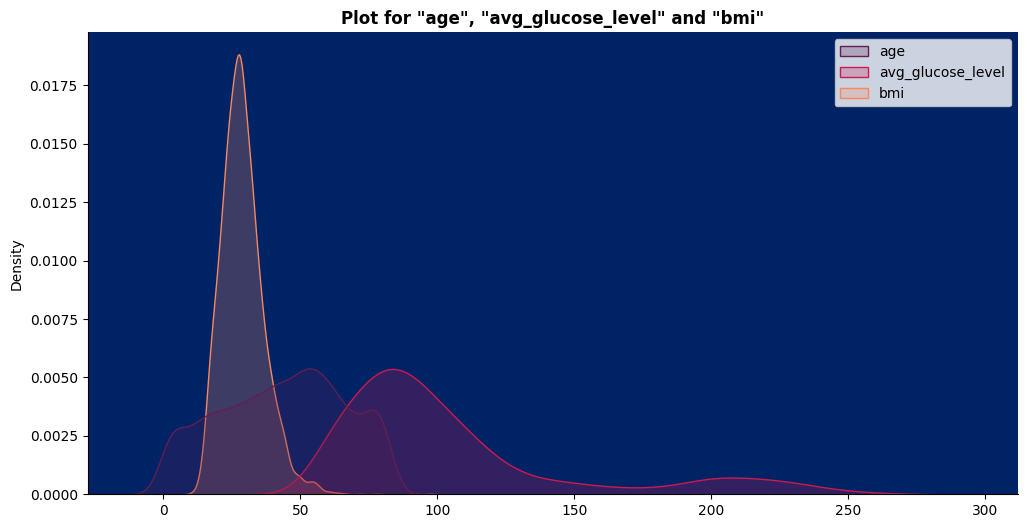

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.rcParams['figure.facecolor'] = '#f6f5f7'
ax = sns.kdeplot(data=data_numerical, shade=True, palette='rocket')
ax.set_facecolor('#002366')
ax.set_title('Plot for "age", "avg_glucose_level" and "bmi"', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


## Skewness and Kurtosis

In [14]:

s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.137059,-0.991010
1,avg_glucose_level,1.572284,1.680479
2,bmi,1.055340,3.362659


### Stroke Analysis

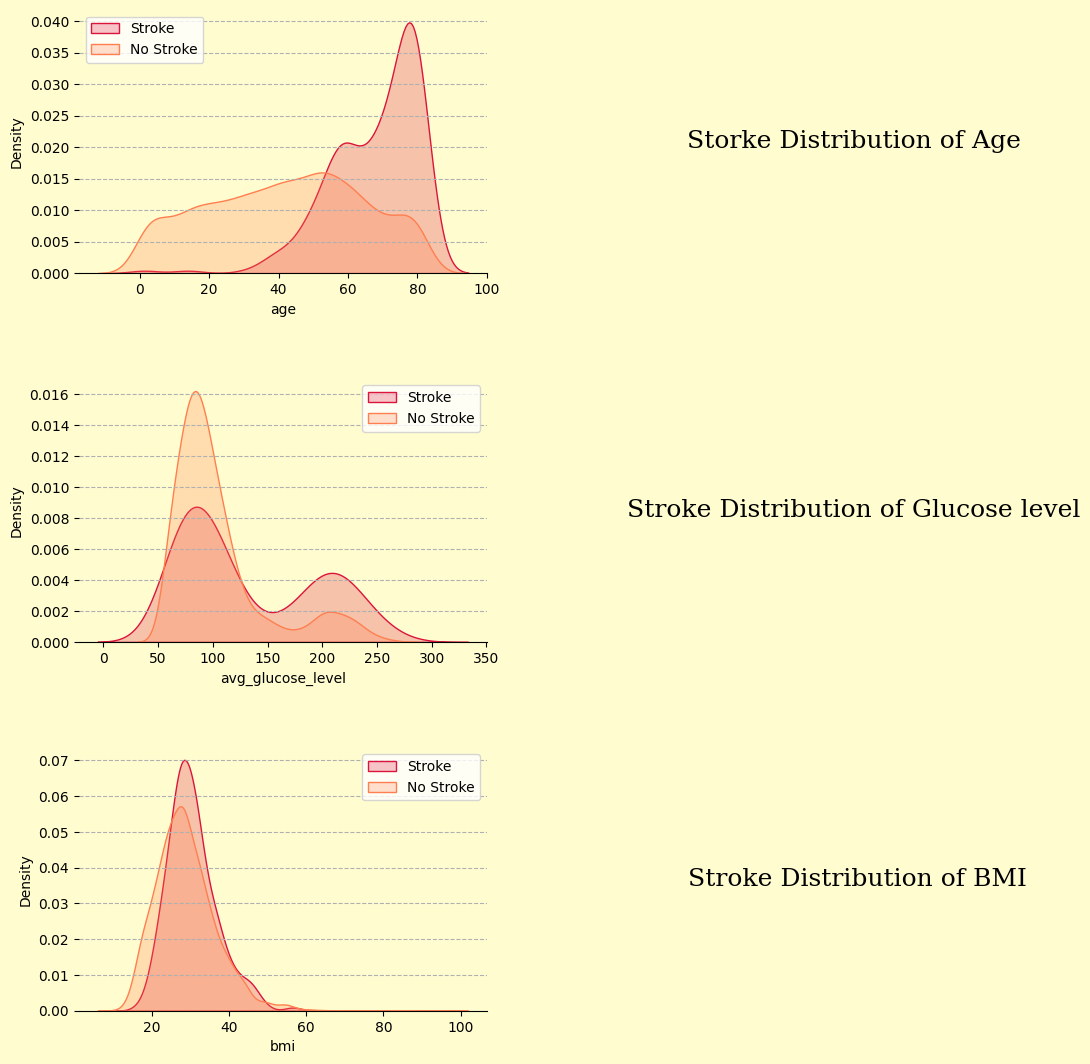

In [15]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#FFFDD0'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Storke Distribution of Age',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Stroke Distribution of Glucose level',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

ax5.text(0.5,0.5,' Stroke Distribution of BMI',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

### Bivariate analysis of Numerical Variables


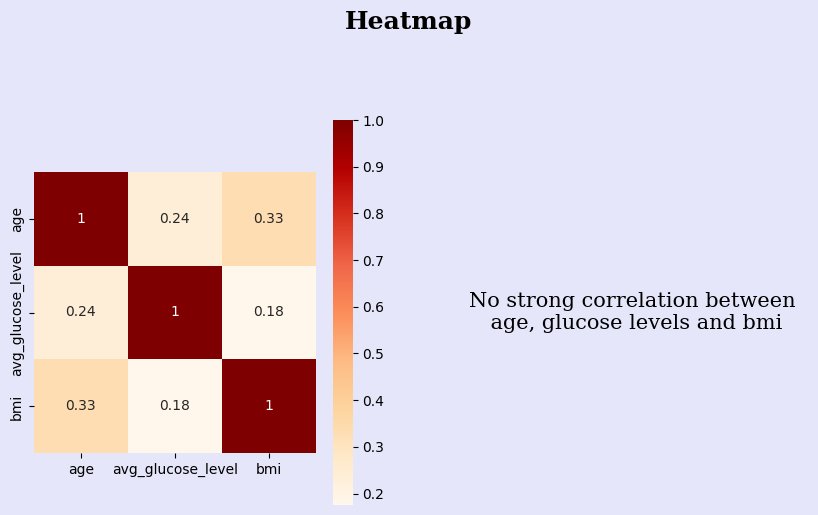

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

# Set background color of subplots and figure
background_color = '#E6E6FA'
for ax in axes:
    ax.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

# Plot heatmap of numerical data
corrmat = data_numerical.corr()
sns.heatmap(ax=axes[0], data=corrmat, annot=True, cmap="OrRd", square=True)

# Add text subplot with no spines, labels or ticks
axes[1].text(0.5, 0.5, 'No strong correlation between\n age, glucose levels and bmi', 
             horizontalalignment='center', verticalalignment='center', fontsize=15, fontfamily='serif')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].tick_params(left=False, bottom=False)
for i in ["top", "right", "bottom", "left"]:
    axes[1].spines[i].set_visible(False)

# Add title to figure
fig.suptitle('Heatmap', fontsize=18, fontweight='bold', fontfamily='serif', y=1.1)

plt.show()


#### Observations :
The available data appears to exhibit significant imbalance, with only a limited number of instances where stroke equals one.

There are a small number of outliers in the Bmi & Age and BMI & Avg Glucose levels features. These outliers will be retained as they represent a relatively small proportion of the overall dataset.

The Age group is widely dispersed across the range of values from 0 to 60, with no particular range showing a significant over-representation of individuals.

Age and Avg glucose levels can be categorized into two distinct clusters, with one containing values less than 150 and the other containing values greater than or equal to 150. The dataset shows that only a small number of individuals with glucose levels less than 150 experienced a stroke.

The analysis of BMI and Glucose levels confirms that individuals with glucose levels less than 150 are less likely to experience a stroke compared to those with glucose levels greater than or equal to 150. Furthermore, individuals with BMI values greater than 40 exhibit lower average glucose levels.

### Correlation plot for numerical variables


Text(-1.7, 1.1, 'Heatmap')

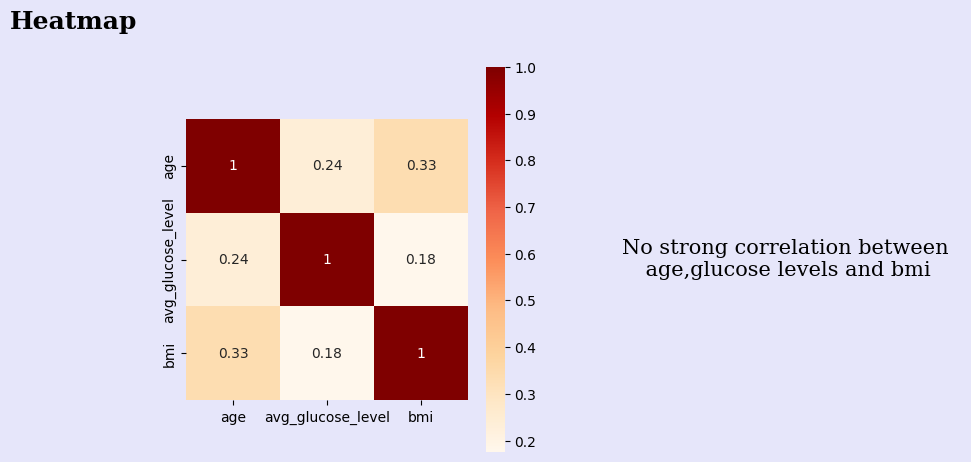

In [17]:
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,2)
# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#E6E6FA'
# changing background color of our plots
for i in axes:
    i.set_facecolor(background_color)
# changing the figure background color
fig.patch.set_facecolor(background_color) 
# heatmap of numerical data
corrmat = data_numerical.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True, cmap="OrRd",square=True)
ax1.text(0.5,0.5,'No strong correlation between\n age,glucose levels and bmi',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Heatmap',fontsize=18,fontweight='bold',fontfamily='serif')    

### Pairplot

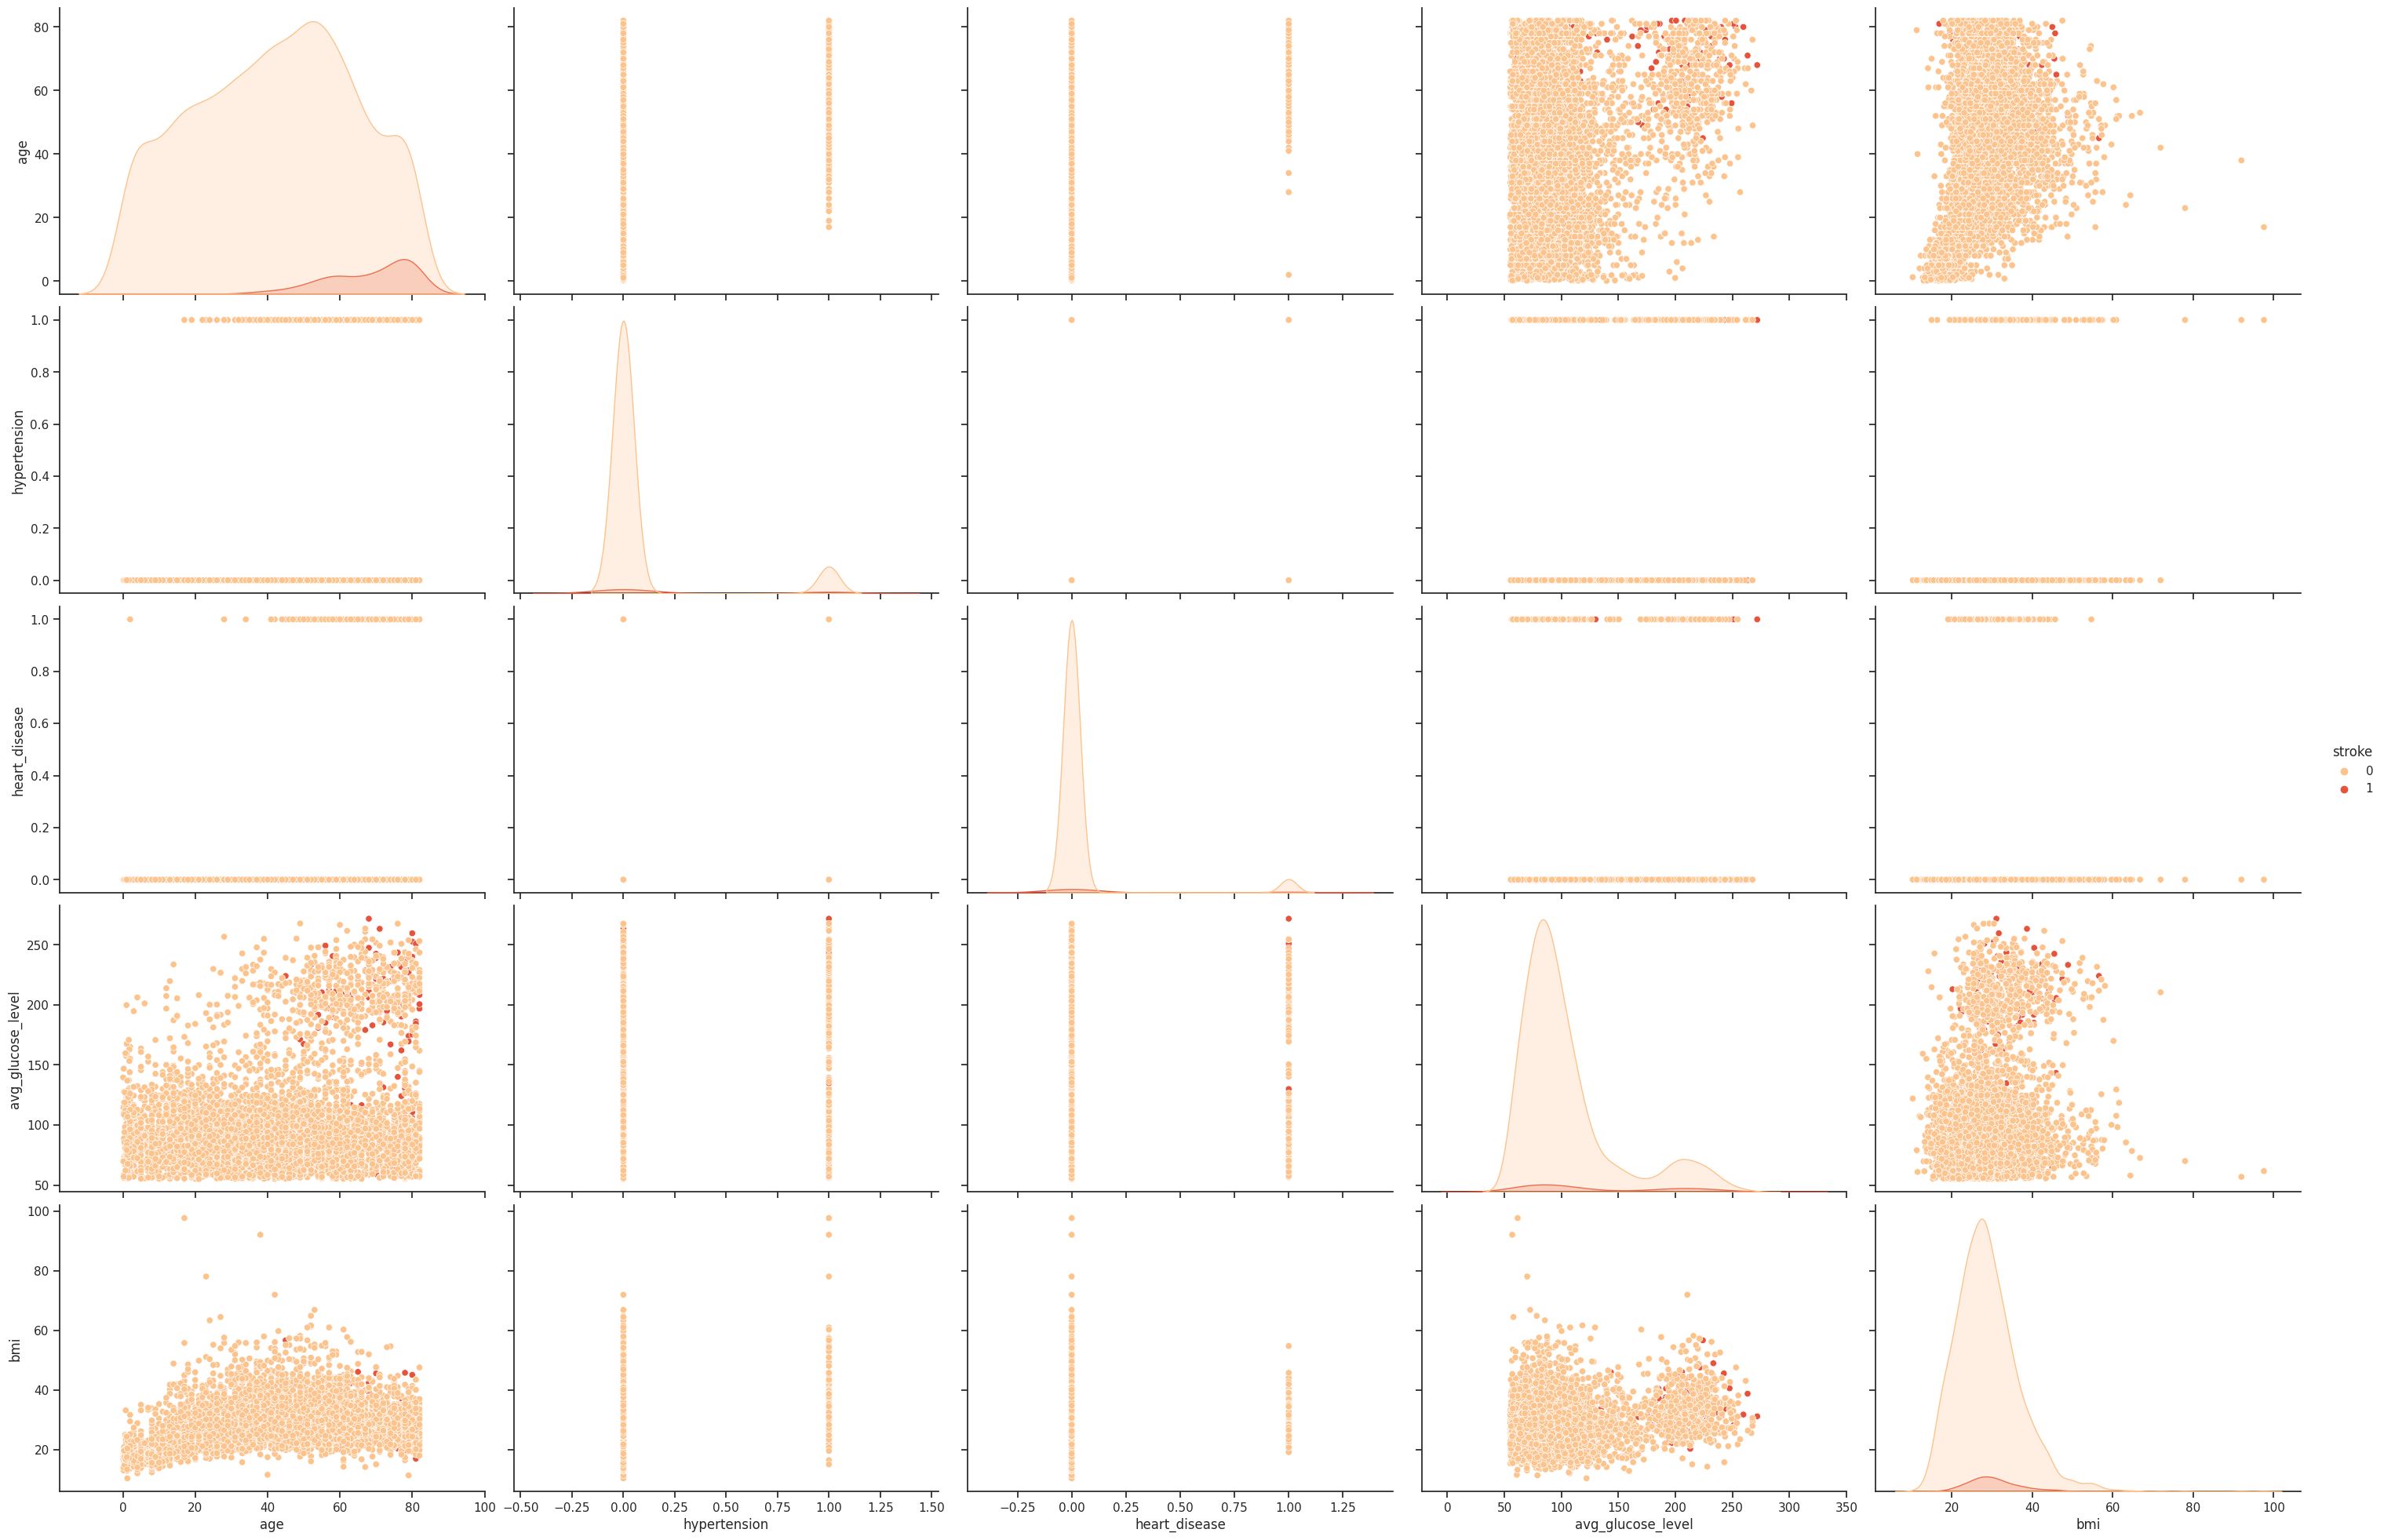

In [18]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=data, hue='stroke', palette='OrRd', height=4, aspect=1.5)
plt.show()


### Analysing Categorical Variables with Stroke


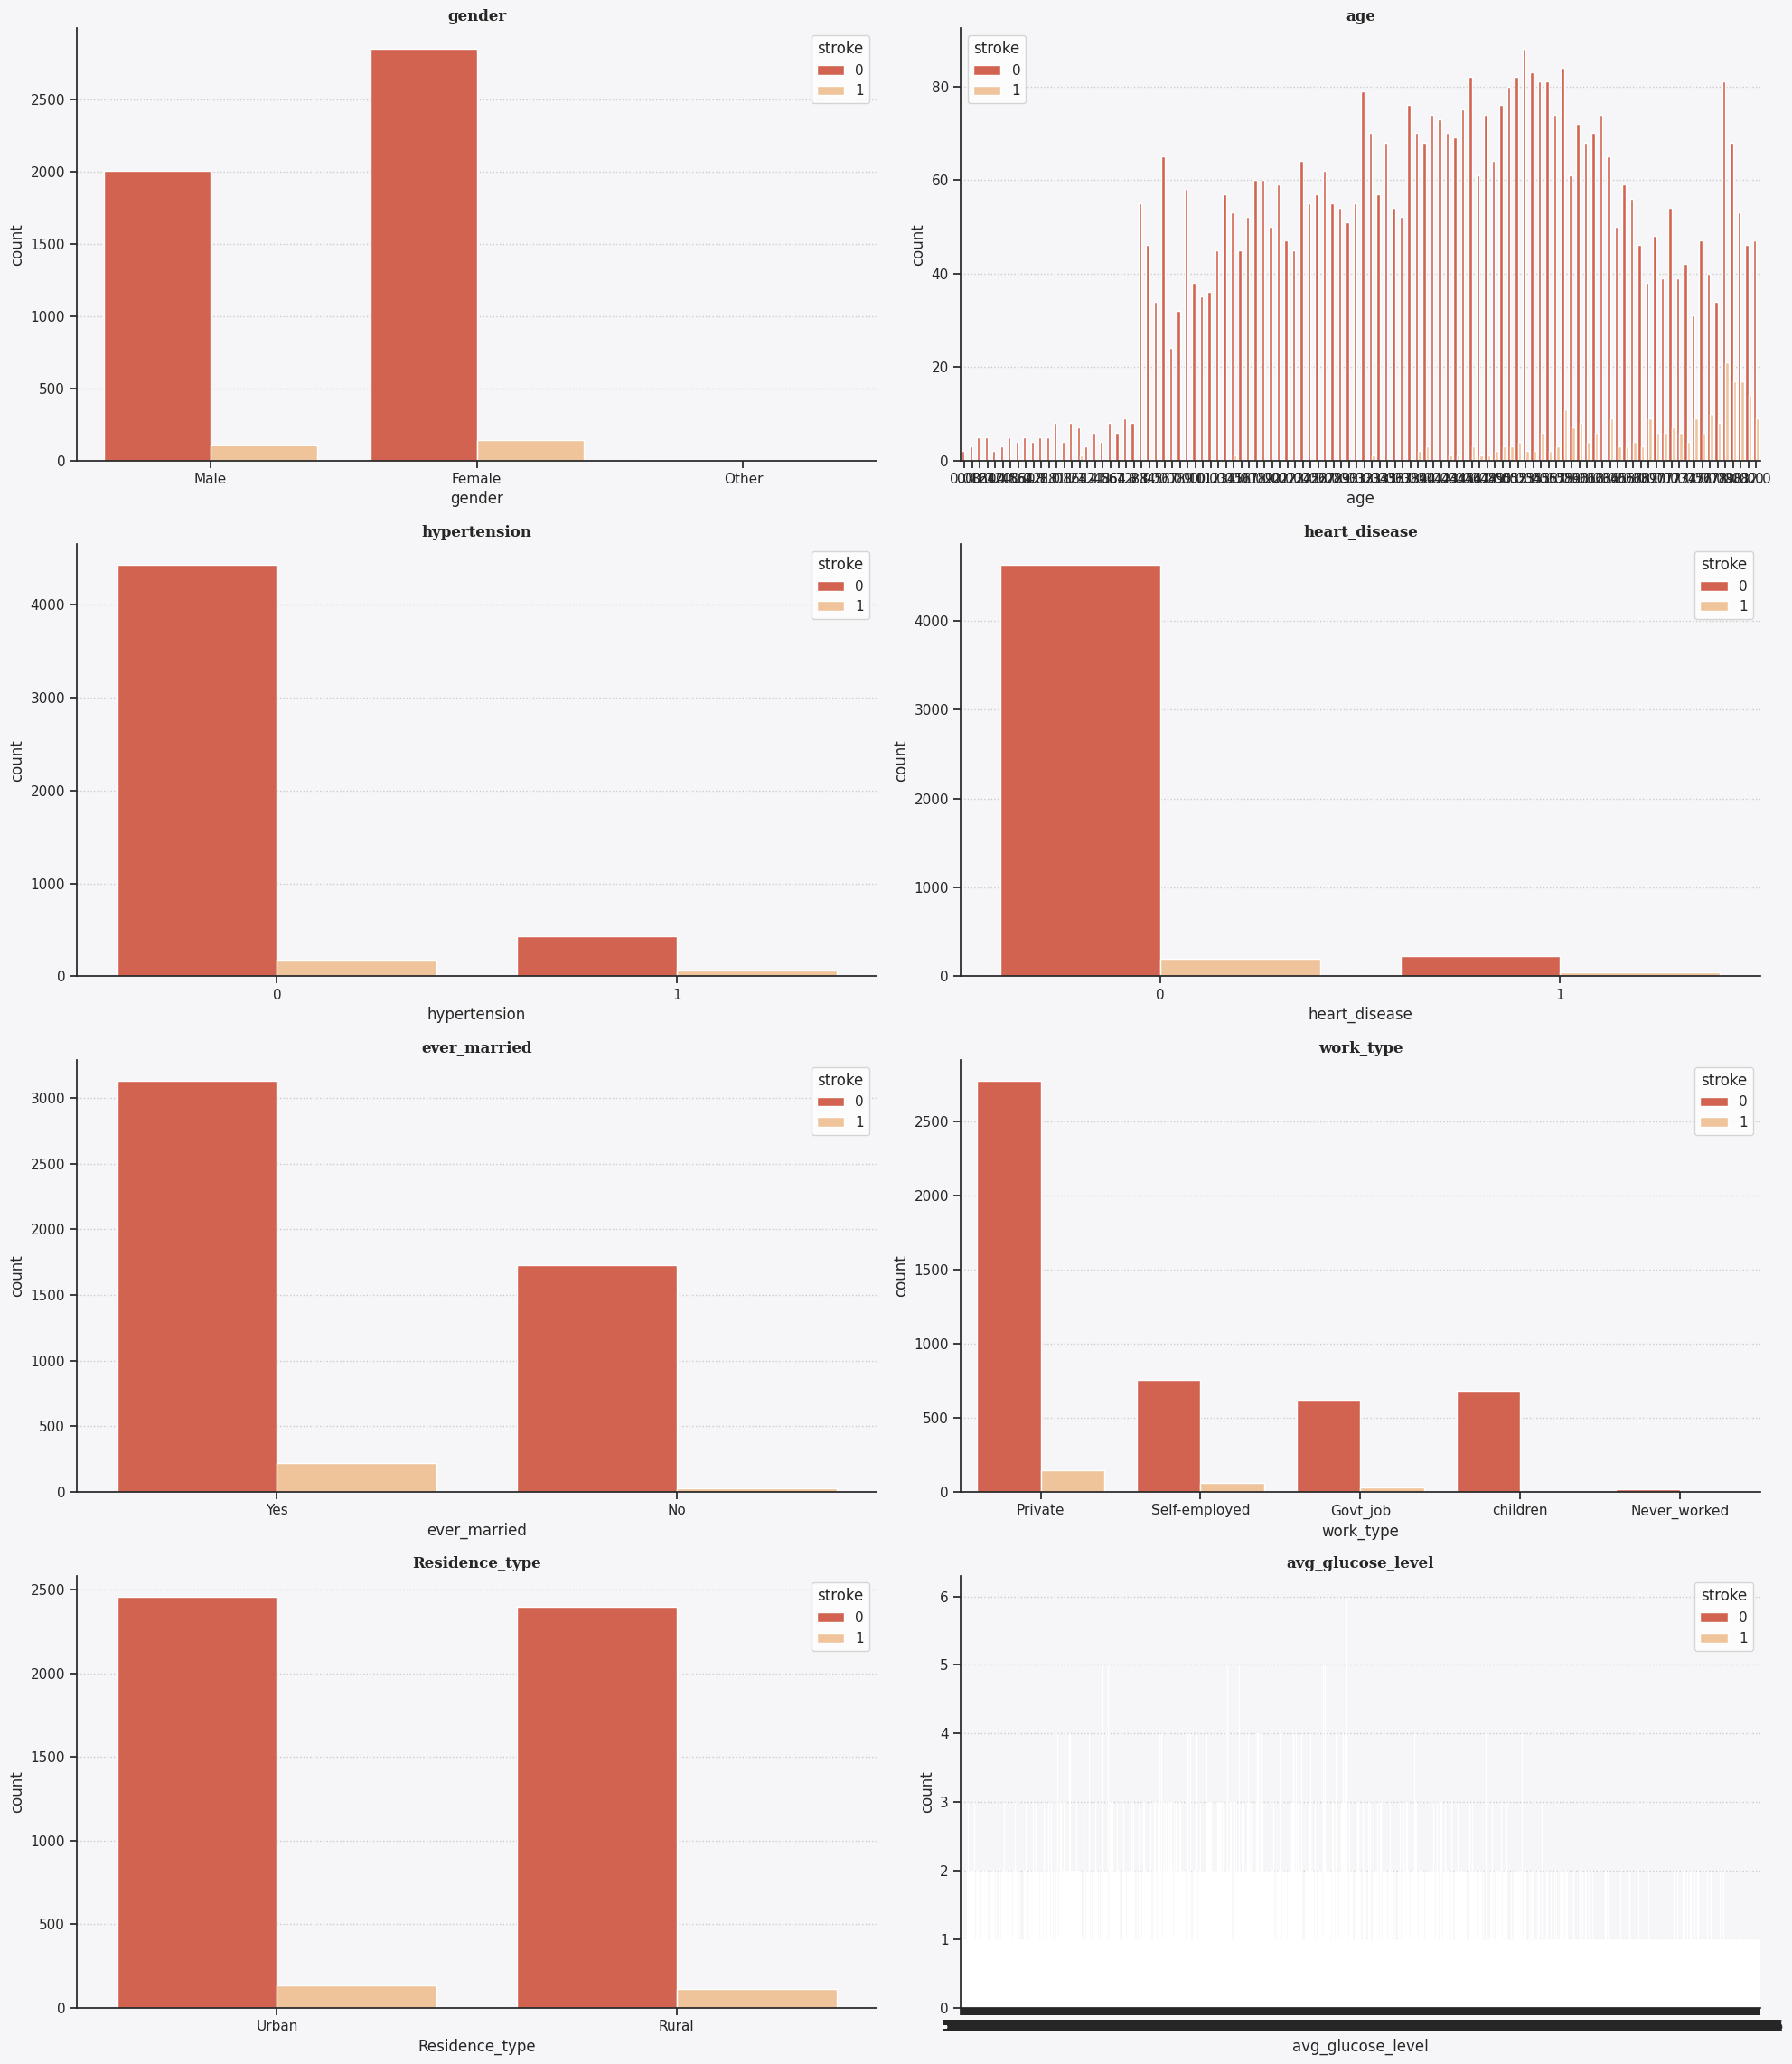

In [19]:
background_color = '#f6f5f7'

fig, axes = plt.subplots(4, 2, figsize=(20, 23), facecolor=background_color)

for ax, val in zip(axes.flatten(), data.columns[:-1]):
    ax.set_facecolor(background_color)
    ax.set_title(val, fontweight='bold', fontfamily='serif')
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(linestyle=':', axis='y')
    sns.countplot(x=val, data=data, palette='OrRd_r', hue='stroke', ax=ax)

plt.tight_layout()


## Smoking Type and Stroke

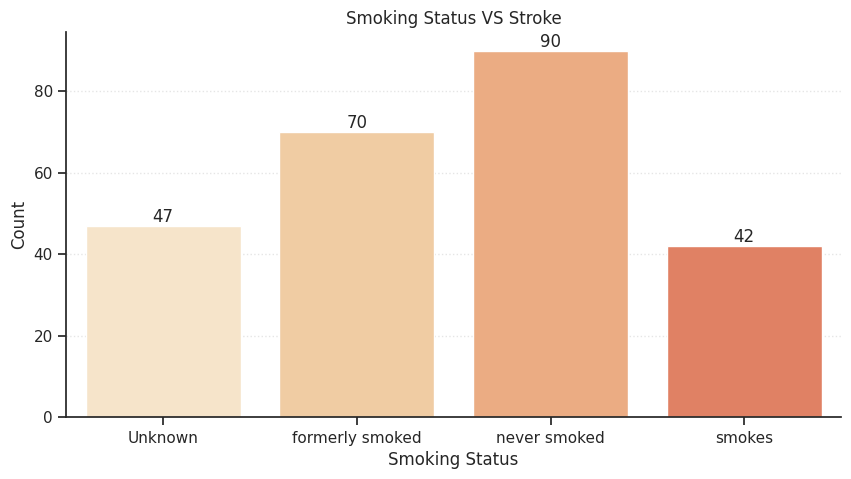

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

pd_stroke = data[data['stroke'] == 1].pivot_table(
    index='smoking_status', values='stroke', aggfunc='count').reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
sns.set_palette('OrRd')

sns.barplot(x='smoking_status', y='stroke', data=pd_stroke, ax=ax)
ax.set(title='Smoking Status VS Stroke', xlabel='Smoking Status', ylabel='Count')
ax.grid(axis='y', linestyle=':', alpha=0.5)

for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), ha='center')

sns.despine(ax=ax, top=True, right=True)


## Marrital Status vs Stroke

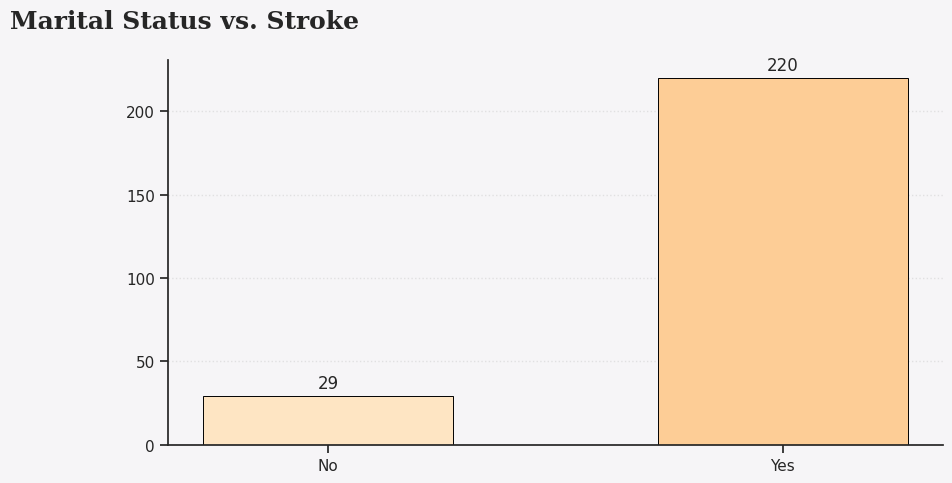

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_stroke = data[data['stroke'] == 1]
pd_stroke = pd.pivot_table(data=data_stroke, index='ever_married', values='stroke', aggfunc='count').reset_index()

fig, ax = plt.subplots(figsize=(10,5))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.bar(pd_stroke['ever_married'], pd_stroke['stroke'], width=0.55, linewidth=0.7, color=sns.color_palette('OrRd'), edgecolor='black')
for i, v in enumerate(pd_stroke['stroke']):
    ax.text(i, v+5, str(v), ha='center')

ax.grid(linestyle=':', axis='y', alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.text(-0.7, 250, 'Marital Status vs. Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()


## Work Type vs Stroke

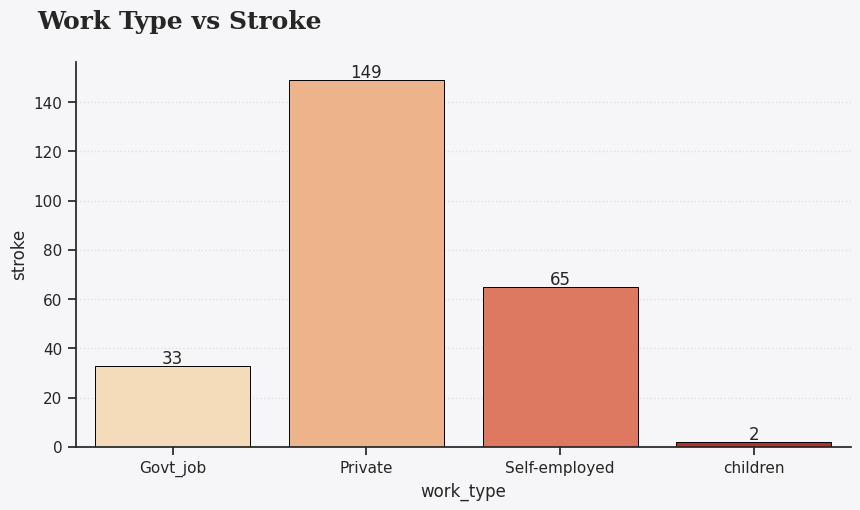

In [22]:
data_stroke = data[data['stroke'] == 1]
pd_stroke = pd.pivot_table(data=data_stroke, index='work_type', values='stroke', aggfunc='count').reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

sns.barplot(x='work_type', y='stroke', data=pd_stroke, ax=ax, palette='OrRd', linewidth=0.7, edgecolor='black')

for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')

ax.grid(linestyle=':', axis='y', alpha=0.5)
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.text(-0.7, 170, 'Work Type vs Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()


## Hypertension vs Stroke

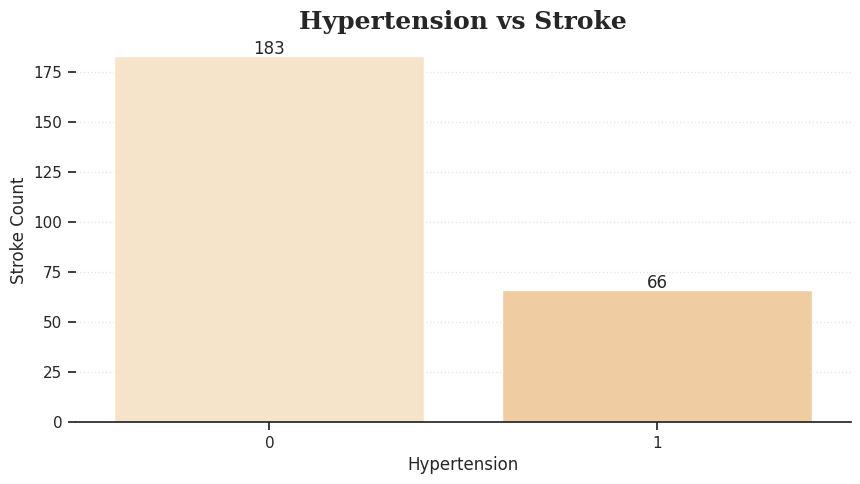

In [23]:
stroke_data = data[data['stroke'] == 1]
pd_stroke = pd.pivot_table(data=stroke_data, index='hypertension', values='stroke', aggfunc='count').reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
sns.set_palette('OrRd')
sns.barplot(x='hypertension', y='stroke', data=pd_stroke, ax=ax)

for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val + 1, round(val, 1), horizontalalignment='center')

ax.grid(linestyle=':', axis='y', alpha=0.5)
ax.set_xlabel('Hypertension')
ax.set_ylabel('Stroke Count')
ax.set_title('Hypertension vs Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
sns.despine(left=True)
plt.show()


## Heart Disease VS Stroke

Text(-0.7, 220, 'Heart Disease VS Stroke')

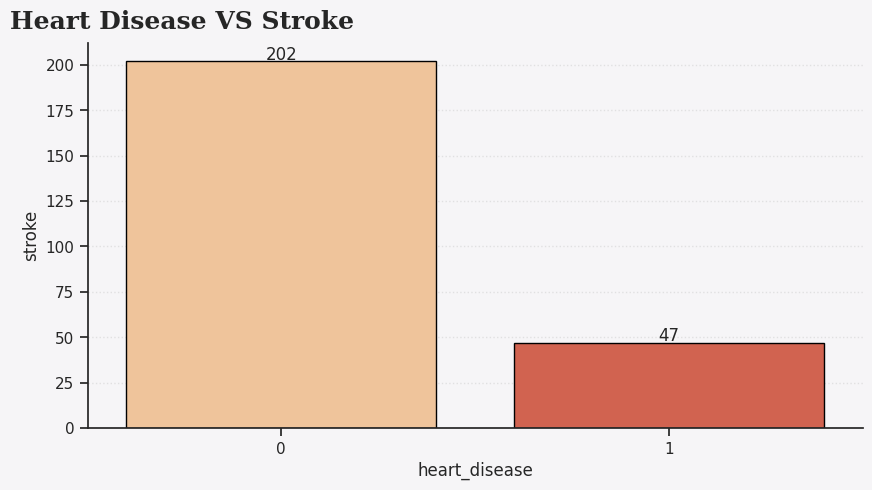

In [24]:

pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['heart_disease'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
sns.barplot(ax=ax,x=pd_stroke['heart_disease'],y=pd_stroke['stroke'],palette='OrRd', edgecolor='black')
for idx,val in enumerate(pd_stroke['stroke']):
    ax.text(idx,val+1,round(val,1),horizontalalignment='center')
ax.grid(linestyle=':',axis='y',alpha=0.5)
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7,220,'Heart Disease VS Stroke',fontsize=18,fontweight='bold',fontfamily='serif')

# **Correlation Matrix**

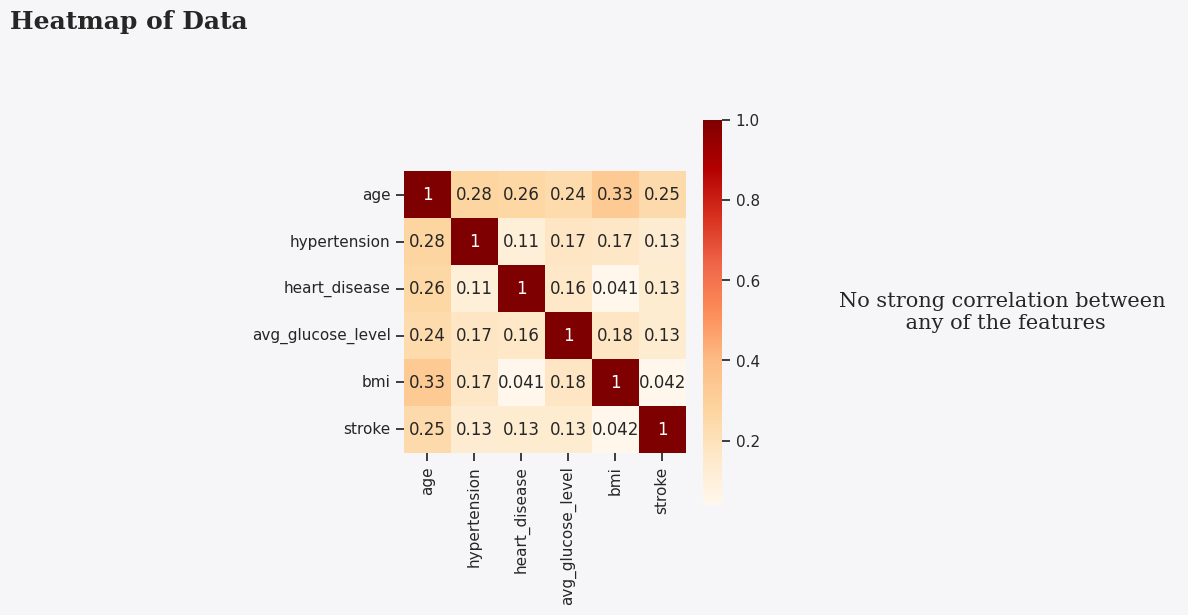

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)

for ax in axes:
    ax.set_facecolor(background_color)

corrmat = data.corr()
sns.heatmap(data=corrmat, annot=True, cmap="OrRd", square=True, ax=axes[0])

axes[1].text(0.5, 0.5, 'No strong correlation between\n any of the features', 
             horizontalalignment='center', verticalalignment='center', fontsize=15, fontfamily='serif')
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].tick_params(left=False, bottom=False)

for spine in ['top', 'right', 'bottom', 'left']:
    axes[1].spines[spine].set_visible(False)

fig.suptitle('Heatmap of Data', fontsize=18, fontweight='bold', fontfamily='serif', x=-0.15, y=1.1)
plt.show()


# Data Preprocessing

In [26]:
data['gender']=data['gender'].apply(lambda x : 1 if x=='Male' else 0) 
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# Removing the observations that have smoking type unknown. 
data=data[data['smoking_status']!='Unknown']

In [27]:
# One Hot encoding smoking_status, work_type
data_dummies = data[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['smoking_status','work_type'],inplace=True)


In [28]:
data_stroke=data['stroke']
data.drop(columns=['stroke'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

### Fitting Train and Test Data




In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np

# check for NaN values in data
print(np.isnan(data).sum())

# impute NaN values with mean
imputer = SimpleImputer()
data = imputer.fit_transform(data)

x_train,x_test,y_train,y_test = train_test_split(data,data_stroke,test_size=0.25,random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

sm = SMOTE(random_state=4)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())


gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               140
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
dtype: int64


### Training the Models

In [30]:
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,x_test,y_test,cmap="OrRd")
    metrics.plot_roc_curve(model, x_test, y_test)  

## **Logistic Regression**

In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create a logistic regression model with hyperparameter tuning
model = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7365470852017937


##  **Decision Tree Classification**

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8385650224215246
